In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_loves=pd.DataFrame(columns=['popcorn','soda pop','candy'],index=np.arange(1,1001))
df_notloves=pd.DataFrame(columns=['popcorn','soda pop','candy'],index=np.arange(1,1001))

In [3]:
for idx in range(1,1001):
    df_loves.loc[idx,'popcorn']=np.abs(np.random.normal(loc=24,scale=4,size=1))
    df_loves.loc[idx,'soda pop']=np.abs(np.random.normal(loc=30,scale=4,size=1))
    df_loves.loc[idx,'candy']=np.abs(np.random.normal(loc=45,scale=12,size=1))

for idx in range(1,1001):
    df_notloves.loc[idx,'popcorn']=np.abs(np.random.normal(loc=2,scale=1,size=1))
    df_notloves.loc[idx,'soda pop']=np.abs(np.random.normal(loc=20,scale=4,size=1))
    df_notloves.loc[idx,'candy']=np.abs(np.random.normal(loc=4,scale=12,size=1))


In [4]:
print(df_loves.head())
print(df_notloves.head())

              popcorn            soda pop               candy
1  26.043026237827622  29.085908444535168  33.836378870415594
2  23.693999373567017  29.300251364019587   51.02976985959653
3  28.384131844204184   31.18846116649137   46.99223792179738
4  21.788865541772893   37.85559076465738    61.6895681744852
5  26.280643063004455  31.088567287283094  49.135821144655736
               popcorn            soda pop               candy
1   0.6852966020984743  20.199494963350872  16.671406006995568
2   1.9149147740249242   25.52348964446598   2.110026237075716
3   3.2384476005126404  21.531475473387186  0.8839730789924731
4  0.41765279092689633  19.366556163406717   6.036624715564325
5   1.5394759714185091  15.304499091631724  12.619390006744158


In [5]:
type(df_loves)
df_loves.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   popcorn   1000 non-null   object
 1   soda pop  1000 non-null   object
 2   candy     1000 non-null   object
dtypes: object(3)
memory usage: 63.5+ KB


In [6]:
sample=['popcorn','soda pop','candy']
for value in sample:
    df_loves[value]=df_loves[value].astype(float)
    df_notloves[value]=df_notloves[value].astype(float)

<Axes: xlabel='popcorn', ylabel='Count'>

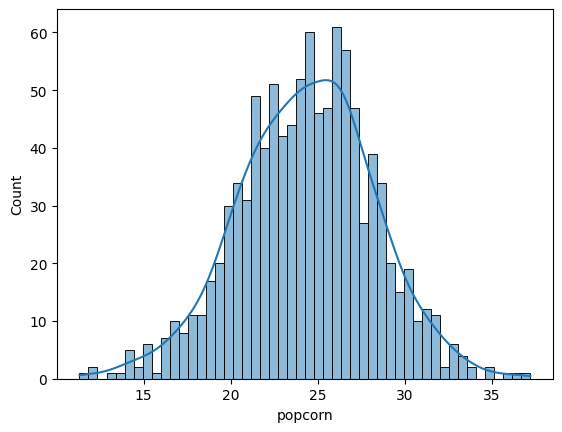

In [7]:
sns.histplot(df_loves['popcorn'],bins=50,kde=True)

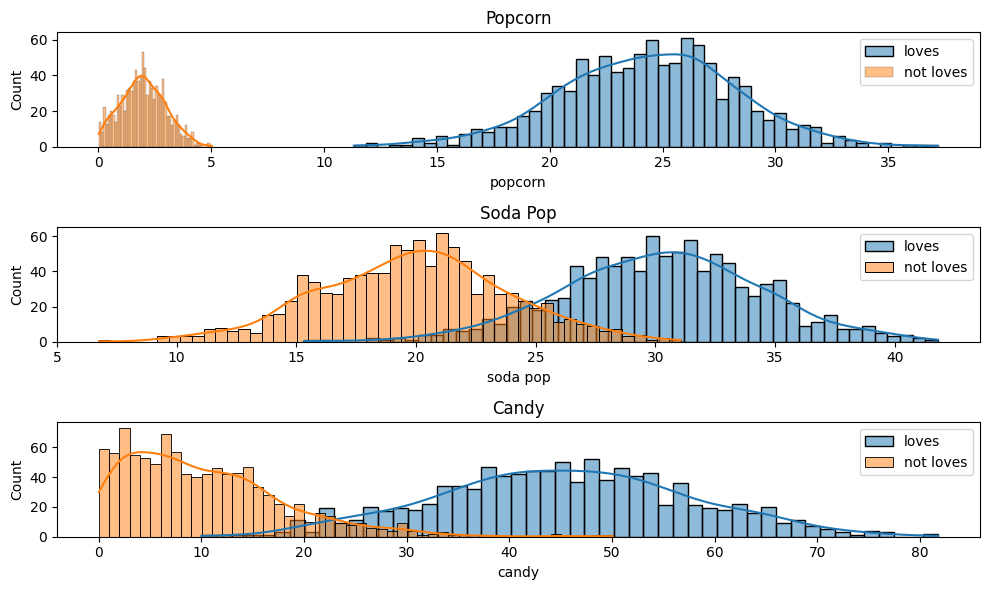

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))
# 1. Popcorn
sns.histplot(df_loves['popcorn'], bins=50, label='loves', kde=True, ax=ax[0])
sns.histplot(df_notloves['popcorn'], bins=50, label='not loves', kde=True, ax=ax[0])
ax[0].legend()
ax[0].set_title("Popcorn")
# 2. Soda Pop
sns.histplot(df_loves['soda pop'], bins=50, label='loves', kde=True, ax=ax[1])
sns.histplot(df_notloves['soda pop'], bins=50, label='not loves', kde=True, ax=ax[1])
ax[1].legend()
ax[1].set_title("Soda Pop")
# 3. Candy
sns.histplot(df_loves['candy'], bins=50, label='loves', kde=True, ax=ax[2])
sns.histplot(df_notloves['candy'], bins=50, label='not loves', kde=True, ax=ax[2])
ax[2].legend()
ax[2].set_title("Candy")

plt.tight_layout()
plt.show()

In [9]:
# initial guesses -> prior probability
p_loves=1000/2000
p_notloves=1000/2000

## a person who eat 20gm of popcorn and 500ml of soda pop and 25gm of candy,so does this man loves Troll2 or not ?

In [10]:
from scipy.stats import gaussian_kde

In [11]:
# popcorn
popcorn_loves=df_loves['popcorn'].dropna().values
popcorn_notloves=df_notloves['popcorn'].dropna().values
#soda pop
soda_loves=df_loves['soda pop'].dropna().values
soda_notloves=df_notloves['soda pop'].dropna().values
#candy
candy_loves=df_loves['candy'].dropna().values
candy_notloves=df_notloves['candy'].dropna().values

In [12]:
# kde for popcorn
kdepopcorn_loves = gaussian_kde(popcorn_loves)
kdepopcorn_notloves = gaussian_kde(popcorn_notloves)
# kde for soda pop
kdesoda_loves = gaussian_kde(soda_loves)
kdesoda_notloves = gaussian_kde(soda_notloves)
#kde for candy
kdecandy_loves = gaussian_kde(candy_loves)
kdecandy_notloves = gaussian_kde(candy_notloves)

In [13]:
popcorn_prop=20
soda_prop=500
candy_prop=25

In [14]:
eps = 1e-10 

# Evaluate KDE likelihoods, then replace any values < eps with eps to avoid log(0) issues

likelyhood_poploves = kdepopcorn_loves.evaluate(popcorn_prop)
likelyhood_poploves = np.maximum(likelyhood_poploves, eps)

likelyhood_popnotloves = kdepopcorn_notloves.evaluate(popcorn_prop)
likelyhood_popnotloves = np.maximum(likelyhood_popnotloves, eps)

likelyhood_sodaloves = kdesoda_loves.evaluate(soda_prop)
likelyhood_sodaloves = np.maximum(likelyhood_sodaloves, eps)

likelyhood_sodanotloves = kdesoda_notloves.evaluate(soda_prop)
likelyhood_sodanotloves = np.maximum(likelyhood_sodanotloves, eps)

likelyhood_candyloves = kdecandy_loves.evaluate(candy_prop)
likelyhood_candyloves = np.maximum(likelyhood_candyloves, eps)

likelyhood_candynotloves = kdecandy_notloves.evaluate(candy_prop)
likelyhood_candynotloves = np.maximum(likelyhood_candynotloves, eps)


In [15]:
# loves troll 2
loves_troll2=np.log(p_loves)+np.log(likelyhood_poploves)+np.log(likelyhood_sodaloves)+np.log(likelyhood_candyloves)
# not loves troll 2
notloves_troll2=np.log(p_notloves)+np.log(likelyhood_popnotloves)+np.log(likelyhood_sodanotloves)+np.log(likelyhood_candynotloves)

In [16]:
print(loves_troll2)
print(notloves_troll2)

[-31.2566405]
[-51.52248572]


In [17]:
if(loves_troll2>notloves_troll2):
    print('Person loves troll2')
else:
    print('Person not loves troll2')

Person loves troll2


#### conclusion: All is correct so we are trying to do with sklearn

### Doing with sklearn

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [19]:
# get only one data frame
df_loves['label']=1
df_notloves['label']=0
df=pd.concat([df_loves,df_notloves])

In [20]:
df.head()

,popcorn,soda pop,candy,label
1,26.043026,29.085908,33.836379,1
2,23.693999,29.300251,51.029770,1
3,28.384132,31.188461,46.992238,1
4,21.788866,37.855591,61.689568,1
5,26.280643,31.088567,49.135821,1


In [21]:
x=df[['popcorn','soda pop','candy']]
y=df['label']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [23]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [24]:
y_pred=model.predict(x_test)

In [25]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[201   0]
 [  0 199]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



#### It had correctly classified 

In [26]:
# Let's say troll2 has [popcorn=20, soda=500, candy=25]
troll2_features = [[20, 500, 25]]
prediction = model.predict(troll2_features)
proba = model.predict_proba(troll2_features)

print("Prediction:", "loves" if prediction[0]==1 else "not loves")
print("Probability:", proba)

Prediction: loves
Probability: [[0. 1.]]


C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# debuging

In [27]:
print("---- Likelihoods ----")
print("P(popcorn | loves):", likelyhood_poploves)
print("P(popcorn | not loves):", likelyhood_popnotloves)
print("P(soda pop | loves):", likelyhood_sodaloves)
print("P(soda pop | not loves):", likelyhood_sodanotloves)
print("P(candy | loves):", likelyhood_candyloves)
print("P(candy | not loves):", likelyhood_candynotloves)

print("\n---- Log Posterior ----")
print("Log P(loves | x):", loves_troll2)
print("Log P(not loves | x):", notloves_troll2)


---- Likelihoods ----
P(popcorn | loves): [0.0549298]
P(popcorn | not loves): [1.e-10]
P(soda pop | loves): [1.e-10]
P(soda pop | not loves): [1.e-10]
P(candy | loves): [0.00969696]
P(candy | not loves): [0.00841586]

---- Log Posterior ----
Log P(loves | x): [-31.2566405]
Log P(not loves | x): [-51.52248572]


In [28]:
print("Sklearn Predicted Probabilities:", model.predict_proba(troll2_features))

Sklearn Predicted Probabilities: [[0. 1.]]


C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Both match hence the manual and by sklearn is correct